In [55]:
from feat import Detector
# rf: https://py-feat.org/content/intro.html#available-models
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(
    face_model=face_model,
    landmark_model=landmark_model,
    au_model=au_model,
    emotion_model=emotion_model
)

Loading Face Detection model:  retinaface
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.8/site-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified

/usr/local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at you

Loading emotion model:  resmasknet


In [56]:
from feat.tests.utils import get_test_data_path
import os

# Py-Featでデフォルトで存在しているテストデータを使う場合
# test_data_dir = get_test_data_path()
# test_image = os.path.join(test_data_dir, "input.jpg")

test_image = './face.jpg'

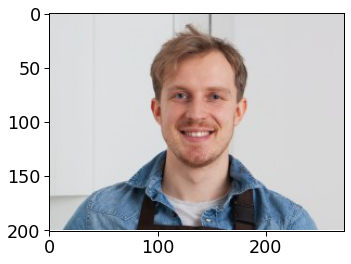

In [57]:
from PIL import Image
import matplotlib.pyplot as plt
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im);

In [58]:
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,102.591438,38.95927,69.803276,97.751617,0.998283,102.855199,102.414743,102.738646,103.693749,...,0.133741,0.068706,0.00005,0.00012,0.000029,0.9989,0.000052,0.000755,0.000095,./face.jpg


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


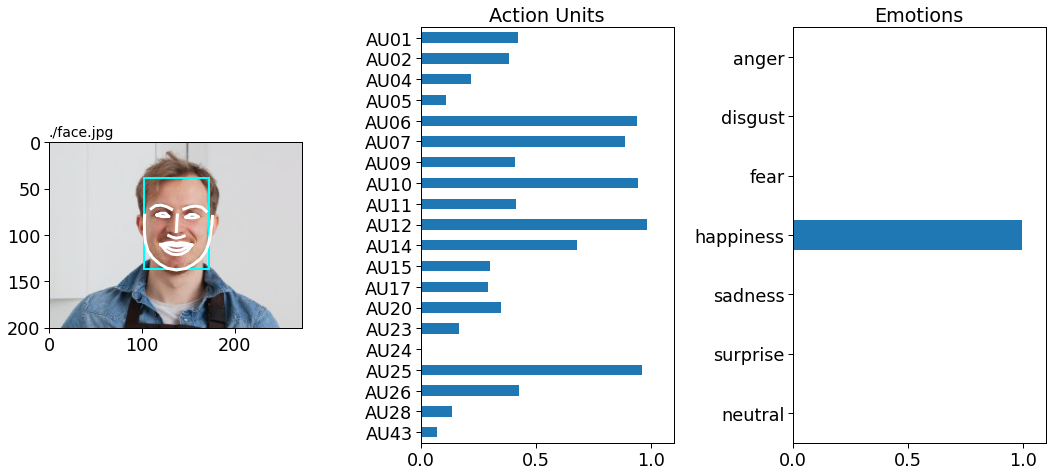

In [59]:
image_prediction.plot_detections();

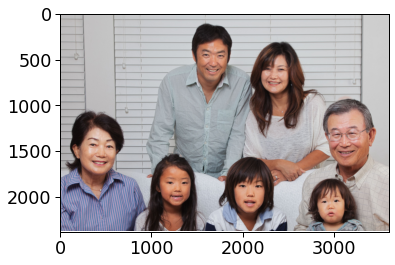

In [60]:
# 表情表現データが複数ある画像
test_image = './many_faces.jpg'

f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im)

In [61]:
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,218.696335,1238.053711,401.300293,533.293701,0.999880,218.186890,213.404875,213.563282,218.857212,...,0.140518,0.120219,0.000628,0.004039,0.002389,0.966033,0.002690,0.021914,0.002307,./many_faces.jpg
1,0.0,2921.488770,1129.358521,433.478516,535.155762,0.999798,2938.369333,2938.814966,2945.722979,2957.771326,...,0.307399,0.460387,0.001392,0.000151,0.001924,0.944997,0.000414,0.045955,0.005167,./many_faces.jpg
2,0.0,1906.350952,1720.287720,339.735962,456.190063,0.999376,1903.487871,1903.076784,1907.411966,1914.817942,...,0.090522,0.052276,0.140582,0.014811,0.135971,0.005156,0.196263,0.251628,0.255590,./many_faces.jpg
3,0.0,1493.170166,270.268097,341.269043,473.348419,0.999249,1495.502574,1492.213773,1493.717547,1500.112898,...,0.252018,0.048917,0.008512,0.000068,0.049290,0.059018,0.134771,0.064657,0.683684,./many_faces.jpg
4,0.0,1097.192871,1671.731567,325.657104,442.055542,0.998693,1086.458147,1090.151208,1097.901593,1109.443877,...,0.115706,0.066699,0.046704,0.001796,0.085217,0.007079,0.105440,0.125037,0.628726,./many_faces.jpg
5,0.0,2823.673096,1921.245117,276.546631,356.049316,0.998558,2816.240339,2820.718265,2828.187120,2838.030863,...,0.088376,0.092767,0.004499,0.004204,0.105332,0.033467,0.056073,0.283301,0.513123,./many_faces.jpg
6,0.0,2195.525391,439.311340,328.869385,447.197021,0.997257,2206.850567,2200.414091,2198.724188,2202.648996,...,0.190288,0.133562,0.002707,0.000044,0.032594,0.007298,0.171611,0.112045,0.673700,./many_faces.jpg


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


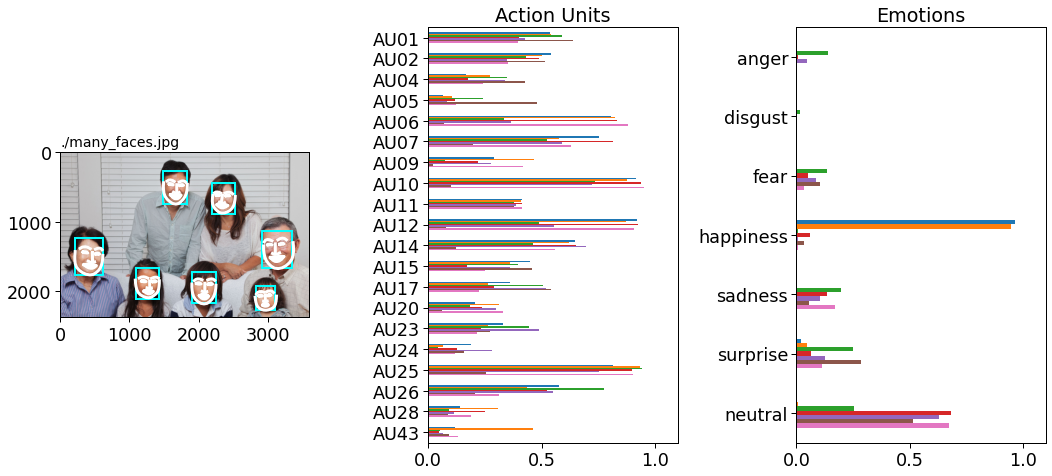

array([<AxesSubplot:title={'left':'./many_faces.jpg'}>,
       <AxesSubplot:title={'center':'Action Units'}>,
       <AxesSubplot:title={'center':'Emotions'}>], dtype=object)

In [62]:
image_prediction.plot_detections()